In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd
from utils import write_cache, read_cache, get_factor_info, sample
from datasets import NoSplit, RatioSplit, CrossValidation

In [2]:
cache_path = "D:/OneDrive - Singapore Management University/cache/netflix_data_small.pickle"
X, factor_info = read_cache(cache_path)

_, _, X = sample(X, axis=0, n_samples=1000, seed=3080)
display(X.shape)

_, _, X = sample(X, axis=1, n_samples=500, seed=4060)
display(X.shape)

[I] Sampling to size 1000
[I]   Sampling seed    : 3080


(1000, 3362)

[I] Sampling to size 500
[I]   Sampling seed    : 4060


(1000, 500)

In [3]:
X_split = NoSplit(X=X)
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

In [6]:
# model selection over k

# k = 5
# tau_list = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
# w = [0.8, 0.2]

# for tau in tau_list:
#     asso = Asso(k=k, tau=tau, w=w)
#     asso._fit_prepare(X_train, display=True) # plot assoc and basis

In [7]:
# grid search over w
k = 10
tau_list = [0.15]
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

# empty table
metrics = ['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

def add_log(df, line):
    df.loc[len(df.index)] = line
    display(df.tail())

[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.4, 0.6]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : True


100%|██████████| 10/10 [00:29<00:00,  2.91s/it]

(1000, 500)
(1000, 10)
(10, 500)


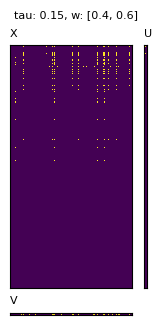

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 21:35:29.287445,10,0.15,0.4,0.6,0.207373,0.78613,0.01216,0.98784,0.328177


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.5, 0.5]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 10/10 [00:29<00:00,  2.97s/it]

(1000, 500)
(1000, 10)
(10, 500)


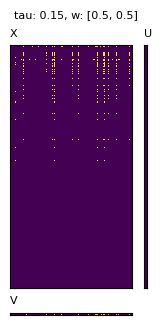

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 21:35:29.287445,10,0.15,0.4,0.6,0.207373,0.786130,0.012160,0.987840,0.328177
1,2023-12-06 21:35:59.985765,10,0.15,0.5,0.5,0.261276,0.708176,0.012122,0.987878,0.381720


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.6, 0.4]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 10/10 [00:31<00:00,  3.12s/it]


(1000, 500)
(1000, 10)
(10, 500)


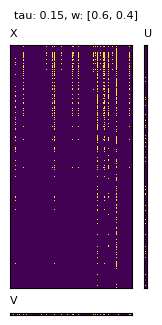

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 21:35:29.287445,10,0.15,0.4,0.6,0.207373,0.786130,0.012160,0.987840,0.328177
1,2023-12-06 21:35:59.985765,10,0.15,0.5,0.5,0.261276,0.708176,0.012122,0.987878,0.381720
2,2023-12-06 21:36:32.148227,10,0.15,0.6,0.4,0.431364,0.563686,0.012926,0.987074,0.488727


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : True


100%|██████████| 10/10 [00:32<00:00,  3.23s/it]


(1000, 500)
(1000, 10)
(10, 500)


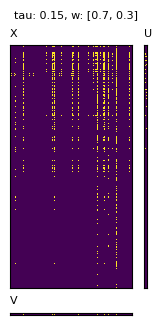

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 21:35:29.287445,10,0.15,0.4,0.6,0.207373,0.786130,0.012160,0.987840,0.328177
1,2023-12-06 21:35:59.985765,10,0.15,0.5,0.5,0.261276,0.708176,0.012122,0.987878,0.381720
2,2023-12-06 21:36:32.148227,10,0.15,0.6,0.4,0.431364,0.563686,0.012926,0.987074,0.488727
3,2023-12-06 21:37:05.547530,10,0.15,0.7,0.3,0.532328,0.487094,0.014726,0.985274,0.508708


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : True


100%|██████████| 10/10 [00:32<00:00,  3.28s/it]


(1000, 500)
(1000, 10)
(10, 500)


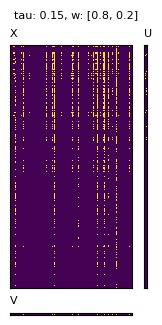

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 21:35:29.287445,10,0.15,0.4,0.6,0.207373,0.786130,0.012160,0.987840,0.328177
1,2023-12-06 21:35:59.985765,10,0.15,0.5,0.5,0.261276,0.708176,0.012122,0.987878,0.381720
2,2023-12-06 21:36:32.148227,10,0.15,0.6,0.4,0.431364,0.563686,0.012926,0.987074,0.488727
3,2023-12-06 21:37:05.547530,10,0.15,0.7,0.3,0.532328,0.487094,0.014726,0.985274,0.508708
4,2023-12-06 21:37:39.380037,10,0.15,0.8,0.2,0.657310,0.369844,0.020948,0.979052,0.473351


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : True


100%|██████████| 10/10 [00:33<00:00,  3.33s/it]

(1000, 500)
(1000, 10)
(10, 500)


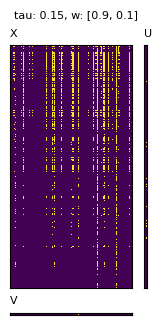

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 21:35:59.985765,10,0.15,0.5,0.5,0.261276,0.708176,0.012122,0.987878,0.381720
2,2023-12-06 21:36:32.148227,10,0.15,0.6,0.4,0.431364,0.563686,0.012926,0.987074,0.488727
3,2023-12-06 21:37:05.547530,10,0.15,0.7,0.3,0.532328,0.487094,0.014726,0.985274,0.508708
4,2023-12-06 21:37:39.380037,10,0.15,0.8,0.2,0.657310,0.369844,0.020948,0.979052,0.473351
5,2023-12-06 21:38:13.566504,10,0.15,0.9,0.1,0.785365,0.250836,0.036668,0.963332,0.380231


In [8]:
for tau in tau_list:
    for w in w_list:
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, display=True)

        results = asso.eval(X_test, metrics=metrics, task='reconstruction')
        add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

In [12]:
# grid search over k

k = 40
tau = 0.15
w = [0.7, 0.3]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, display=False)
display(asso.df_eval)

[I] k            : 40
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[I] display      : False


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : False


100%|██████████| 40/40 [02:58<00:00,  4.47s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:05:03.880083,0,0.15,0.7,0.3,0.292697,1.0,0.707303,0.292697,0.452846
1,2023-12-06 22:05:08.458156,1,0.15,0.7,0.3,0.378997,1.0,0.621003,0.378997,0.549671
2,2023-12-06 22:05:13.369370,2,0.15,0.7,0.3,0.420891,1.0,0.579109,0.420891,0.592432
3,2023-12-06 22:05:17.876233,3,0.15,0.7,0.3,0.447005,1.0,0.552995,0.447005,0.617834
4,2023-12-06 22:05:22.041909,4,0.15,0.7,0.3,0.463622,1.0,0.536378,0.463622,0.633527
5,2023-12-06 22:05:26.277060,5,0.15,0.7,0.3,0.482893,1.0,0.517107,0.482893,0.651285
6,2023-12-06 22:05:30.567119,6,0.15,0.7,0.3,0.494903,1.0,0.505097,0.494903,0.662121
7,2023-12-06 22:05:34.751456,7,0.15,0.7,0.3,0.505795,1.0,0.494205,0.505795,0.671798
8,2023-12-06 22:05:39.009590,8,0.15,0.7,0.3,0.523949,1.0,0.476051,0.523949,0.687620
9,2023-12-06 22:05:43.305980,9,0.15,0.7,0.3,0.532328,1.0,0.467672,0.532328,0.694796


(1000, 500)
(1000, 500)


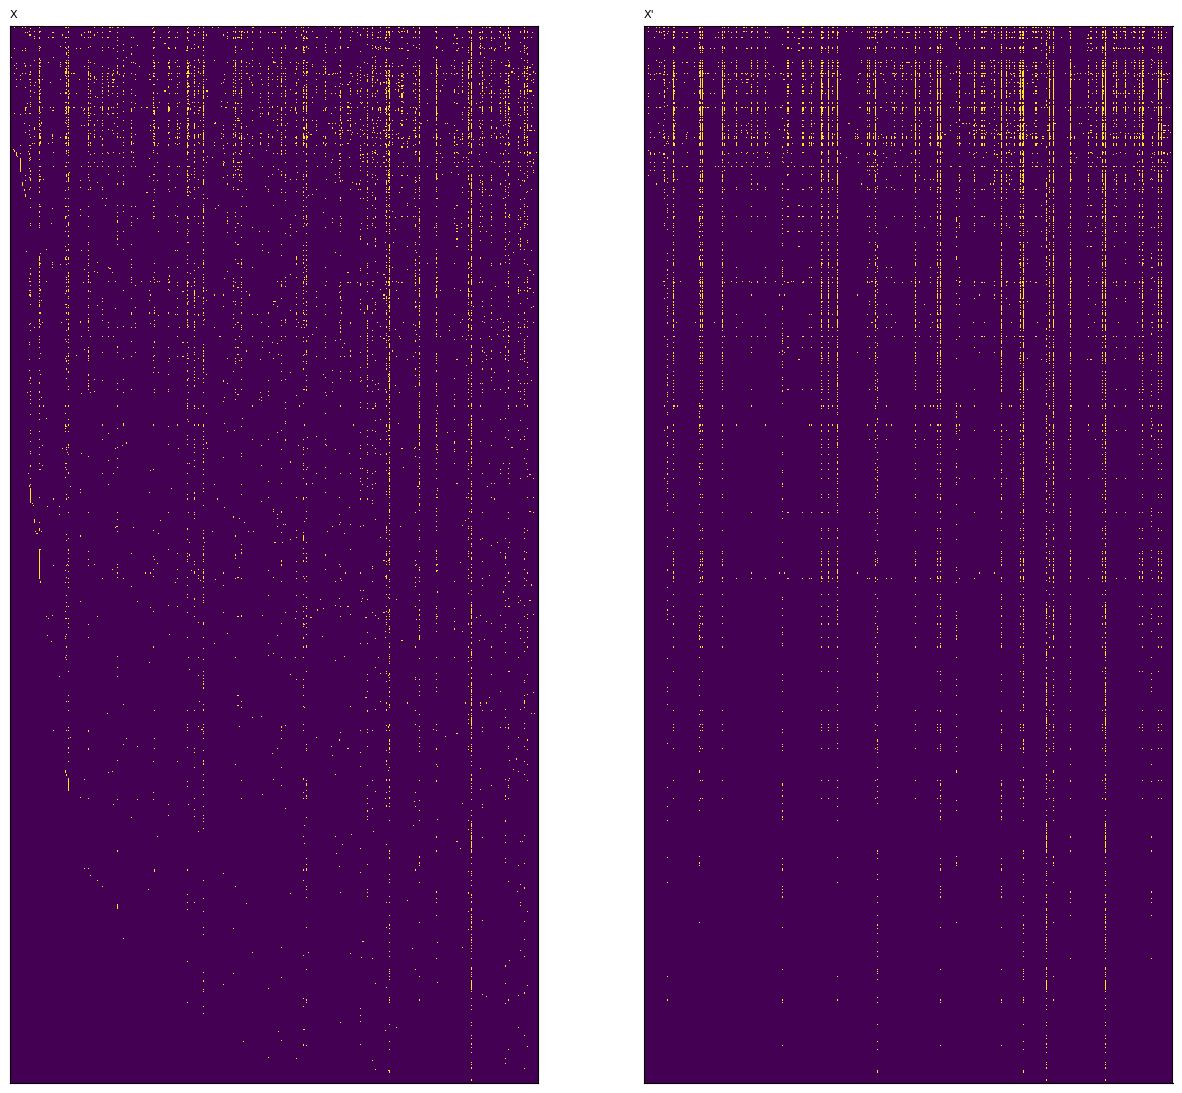

In [13]:
from utils import show_matrix, to_dense, matmul

show_matrix(settings=[(to_dense(X), [0, 0], 'X'), (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")])

<Axes: >

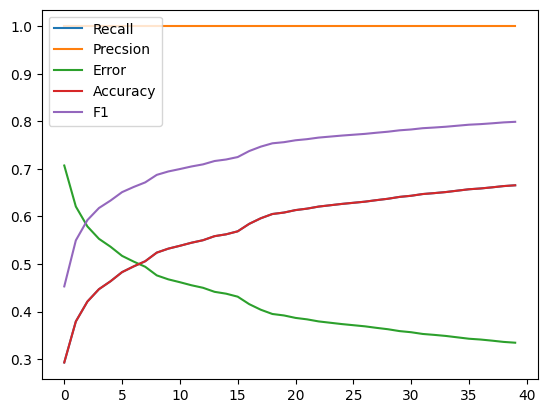

In [22]:
asso.df_eval[['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']].plot()